Rodent melanopsin with overhead projector
=========================================

In [55]:
import pandas as pd
from pysilsub import observers, problems

# Create custom rodent model
class Rodent(observers._Observer):
    def __init__(self):
        super().__init__()

mouse = Rodent()

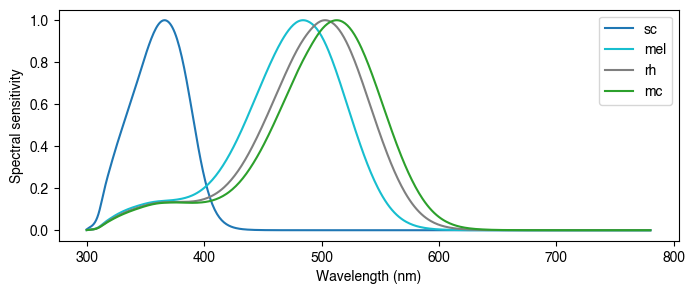

In [56]:
mouse.action_spectra = pd.read_csv(
    '../../data/rodent_action_spectra.csv',
    index_col='Wavelength'
)
mouse.photoreceptors = mouse.action_spectra.columns.tolist()
mouse.photorecptor_colors = {
        "sc": "tab:blue",
        "mel": "tab:cyan",
        "rh": "tab:grey",
        "mc": "tab:green"
}
mouse.plot_action_spectra(figsize=(8, 3));

In [57]:
ssp = problems.SilentSubstitutionProblem.from_package_data('VirtualSky')


ValueError: matrices are not aligned

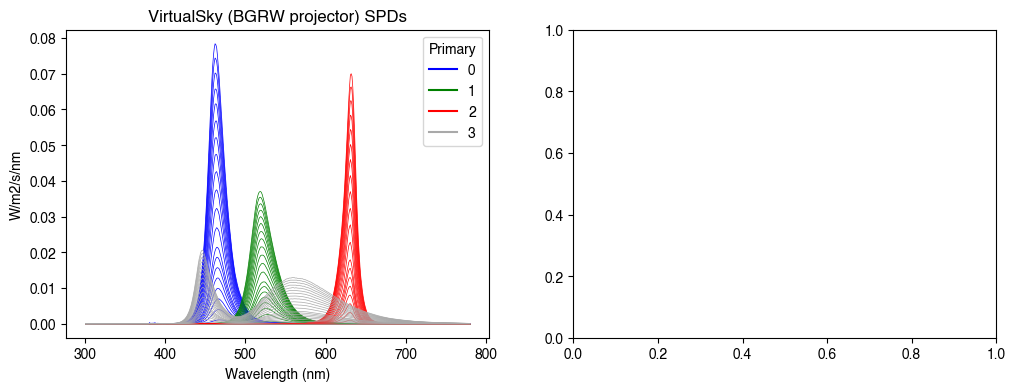

In [60]:
_ = ssp.plot_calibration_spds_and_gamut()

In [28]:
ssp.observer = mouse

In [59]:
ssp.calibration = ssp.calibration.reindex(range(300, 781, 1), axis=1).fillna(0)

In [46]:
ssp.ignore = ['rh']
ssp.minimize = ['sc', 'mc']
ssp.modulate = ['mel']
ssp.target_contrast = .1
ssp.print_problem()

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: VirtualSky (BGRW projector)
Ignoring: ['rh']
Minimising: ['sc', 'mc']
Modulating: ['mel']
Target contrast: [ 0.1]
Background: None




In [39]:
solution = ssp.optim_solve()

> No background specified, will optimise background.
> Performing local optimization with SLSQP.
  NIT    FC           OBJFUN            GNORM
    1    10     1.532252E+00     7.701326E-01
    2    20     9.004639E-04     2.636180E-01
    3    29     3.237363E-04     1.561417E-01
    4    39     1.511350E-03     5.447977E-02
    5    48     1.513414E-03     1.818163E-01
    6    57     5.238031E-03     1.801536E-01
    7    67     1.164441E-05     1.238127E-01
    8    77     1.199788E-05     1.093323E-01
    9    88     1.675765E-03     1.060822E-01
   10    97     1.688373E-03     1.812565E-01
   11   107     1.907870E-03     1.811725E-01
   12   117     6.171141E-04     1.818830E-01
   13   126     2.172647E-04     1.080345E-01
   14   135     3.042311E-04     6.463643E-02
   15   147     5.630794E-04     5.935874E-02
   16   158     2.059463E-03     6.000055E-02
   17   168     1.169219E-03     1.002339E-01
   18   178     3.828858E-03     1.049862E-01
   19   189     7.944206E-05 

In [45]:
ssp.plot_solution(solution.x)

ValueError: matrices are not aligned

In [47]:
ssp.calibration

Wavelength       300  301  302  303  304  305  306  307  308  309  ...  \
Primary Setting                                                    ...   
0       0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        13       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        26       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        39       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        52       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
3       208      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        221      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        234      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        247      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
        260      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

Wavelength            771       772       773       774       775       776  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        13       0.000016  0.000018  0.000019  0.000021  0.000022  0.000024   
        26       0.000020  0.000022  0.000020  0.000023  0.000029  0.000025   
        39       0.000011  0.000013  0.000015  0.000019  0.000025  0.000025   
        52       0.000015  0.000021  0.000020  0.000018  0.000016  0.000024   
...                   ...       ...       ...       ...       ...       ...   
3       208      0.000097  0.000095  0.000093  0.000093  0.000093  0.000088   
        221      0.000108  0.000106  0.000102  0.000097  0.000090  0.000093   
        234      0.000120  0.000117  0.000110  0.000105  0.000101  0.000100   
        247      0.000123  0.000118  0.000119  0.000116  0.000110  0.000106   
        260      0.000130  0.000128  0.000123  0.000121  0.000122  0.000117   

Wavelength            777       778       779       780  
Primary Setting                                          
0       0        0.000000  0.000000  0.000000  0.000000  
        13       0.000027  0.000030  0.000033  0.000037  
        26       0.000024  0.000028  0.000028  0.000028  
        39       0.000026  0.000028  0.000031  0.000034  
        52       0.000030  0.000031  0.000029  0.000028  
...                   ...       ...       ...       ...  
3       208      0.000084  0.000079  0.000079  0.000079  
        221      0.000096  0.000097  0.000095  0.000093  
        234      0.000097  0.000091  0.000093  0.000094  
        247      0.000103  0.000101  0.000098  0.000094  
        260      0.000115  0.000114  0.000106  0.000099  

[84 rows x 481 columns]

In [48]:
ssp.observer.action_spectra

,sc,mel,rh,mc
Wavelength,,,,
300,4.085733e-03,7.538650e-04,6.758020e-04,5.772220e-04
301,8.295606e-03,1.486809e-03,1.293361e-03,1.170742e-03
302,1.187551e-02,2.105903e-03,1.814589e-03,1.668738e-03
303,1.532018e-02,2.703148e-03,2.319884e-03,2.147040e-03
304,1.912431e-02,3.370548e-03,2.889648e-03,2.681479e-03
...,...,...,...,...
776,2.830000e-39,-4.850000e-19,3.670000e-16,-1.940000e-14
777,4.950000e-39,-8.480000e-19,6.420000e-16,-3.400000e-14
778,5.650000e-39,-9.690000e-19,7.340000e-16,-3.890000e-14


In [44]:
solution.x

array([ 0.49368151,  0.96872133,  0.17539121,  0.31373265,  0.63937275,
        0.88092623,  0.18384318,  0.09470618])

In [54]:
ssp.predict_multiprimary_aopic(solution.x[0:4])

sc     0.001069
mel    1.663198
rh     1.863660
mc     1.898722
Name: 0, dtype: float64